## Name: Thota Siddartha
## Reg No: BL.EN.U4AIE21132

**Use HMM for classification of your speech signal using STFT features**

In [1]:
pip install hmmlearn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 487.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [3]:
pip install numpy==1.21


Note: you may need to restart the kernel to use updated packages.Collecting numpy==1.21
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.0/10.3 MB 325.1 kB/s eta 0:00:32
     --------------------------------------- 0.0/10.3 MB 325.1 kB/s eta 0:00:32
     --------------------------------------- 0.1/10.3 MB 297.7 kB/s eta 0:00:35
     --------------------------------------- 0.1/10.3 MB 374.1 kB/s eta 0:00:28
      -------------------------------------- 0.2/10.3 MB 654.4 kB/s eta 0:00:16
      -------------------------------------- 0.2/10.3 MB 719.7 kB/s eta 0:00:14
      -------------------------------------- 0.3/10.3 MB 785.2 kB/s eta 0:00:13
     - ------------------------------------- 0.3/10.3 MB 756.6 kB/s eta 0:00:14
     - ------------------------------------- 0.4/10.3 MB 794.9 kB/s eta 0:00:13
     - ------------------------------------- 0.4

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [206 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.0 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\THOTA SIDDARTHA\\AppData\\Local\\Programs\\Python\\Python311\\lib', 'C:\\', 'C:\\Users\\THOTA SIDDARTHA\\AppData\\Local\\Programs\\Python\\Python311\

In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


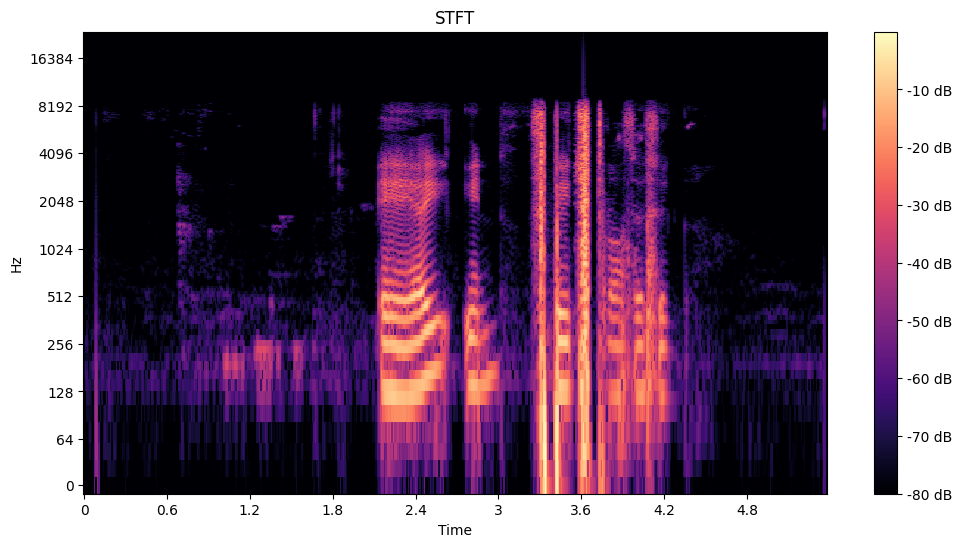

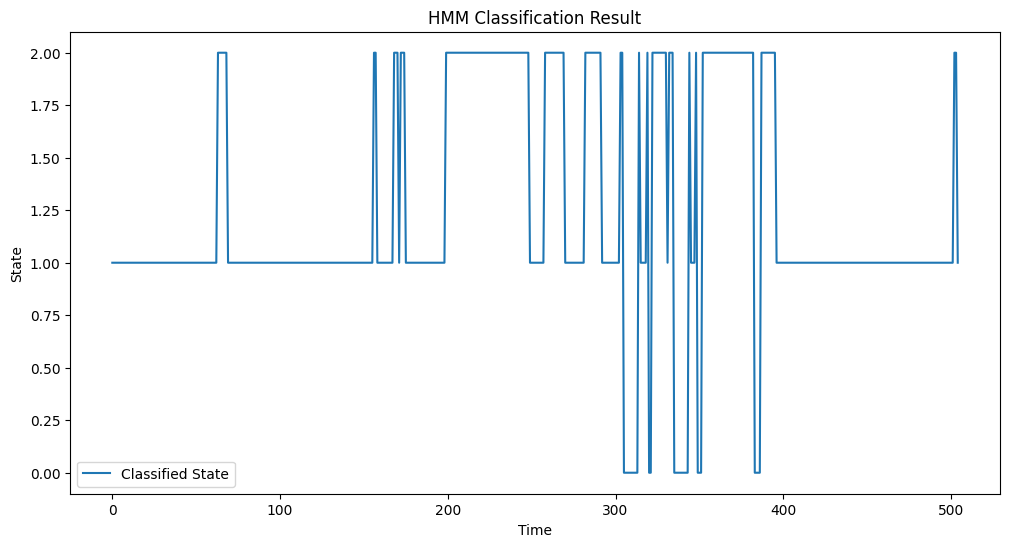

HMM Model Parameters:
Transition Matrix:
[[0.81481481 0.         0.18518519]
 [0.         0.96374622 0.03625378]
 [0.03424658 0.08219178 0.88356164]]
Means:
[[1.71793505e+01 2.23718008e+01 2.88000440e+01 ... 2.19245043e-03
  2.33457293e-03 2.31888316e-03]
 [8.92290003e-02 6.56917549e-02 4.33264179e-02 ... 2.58623536e-04
  2.52082468e-04 2.30630385e-04]
 [1.12154607e+00 1.35283129e+00 1.45247463e+00 ... 2.86912976e-04
  2.84891356e-04 2.85425941e-04]]
Covariances:
[[[7.53561160e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 9.78979986e+02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.28422776e+03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.02757455e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   4.05601144e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = r"Siddartha.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
